In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [23]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target
print (df.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [24]:
x_c = df.drop('target', axis=1)
y_c = df['target']
x_train , x_test , y_train , y_test = train_test_split (
    x_c , y_c , test_size=0.3 , random_state =101
)

print('Train set shape:' , x_train.shape)
print('Test set shape:', x_test.shape)

Train set shape: (398, 30)
Test set shape: (171, 30)


In [25]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train_c_scaled = scaler.transform(x_train)
x_test_c_scaled = scaler.transform(x_test)
df_train_scaled = pd.DataFrame(x_test_c_scaled , columns = x_c.columns)
print(df_train_scaled.describe())

       mean radius  mean texture  mean perimeter   mean area  mean smoothness  \
count   171.000000    171.000000      171.000000  171.000000       171.000000   
mean      0.098511     -0.027004        0.096880    0.076126         0.012763   
std       0.936924      0.942378        0.943133    0.948122         1.001219   
min      -1.512369     -2.044798       -1.505329   -1.191476        -2.146446   
25%      -0.596992     -0.685813       -0.573823   -0.588204        -0.674054   
50%      -0.150875     -0.131475       -0.192835   -0.236937        -0.075850   
75%       0.712083      0.508585        0.631929    0.563179         0.707292   
max       3.928311      2.604781        3.939495    5.186491         4.772374   

       mean compactness  mean concavity  mean concave points  mean symmetry  \
count        171.000000      171.000000           171.000000     171.000000   
mean           0.031897       -0.004396             0.065491      -0.028694   
std            0.993707        0.

In [26]:
knn_cancer = KNeighborsClassifier(n_neighbors=1)
knn_cancer.fit(x_train_c_scaled , y_train)

,n_neighbors,1
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [27]:
predictions_c = knn_cancer. predict(x_test_c_scaled)

Confusion Matrix:
[[ 61   5]
 [  3 102]]


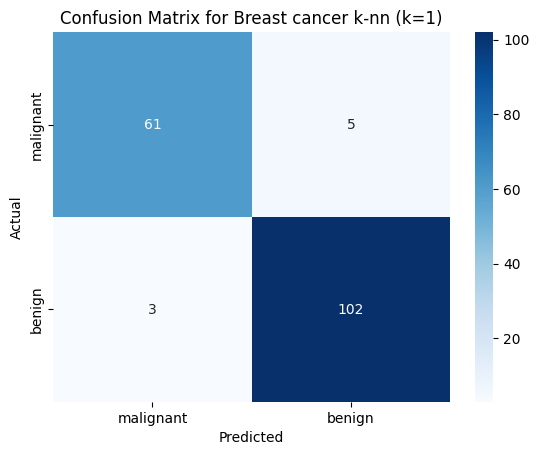

In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test , predictions_c)
print("Confusion Matrix:")
print(cm)

plt.Figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d' , cmap='Blues',
            xticklabels=cancer.target_names,
            yticklabels=cancer.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Breast cancer k-nn (k=1)')
plt.show()